In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/9000-movies-dataset/mymoviedb.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Reading the dataset

In [3]:
df=pd.read_csv('/kaggle/input/9000-movies-dataset/mymoviedb.csv', lineterminator='\n')

In [4]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# Descovering data

In [5]:
df.shape

(9827, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [7]:
df.isna().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


# Data cleaning

In [10]:
df.columns=df.columns.str.lower()

In [11]:
df.drop(["overview","poster_url"],axis=1,inplace=True)

In [12]:
#cleaning release_date col
df['release_date'] = pd.to_datetime(df['release_date'])

In [13]:
df["release_year"]=df["release_date"].dt.year

In [14]:
df["release_month"]=df["release_date"].dt.month
df.drop("release_date",axis=1,inplace=True)

In [15]:
df['season'] = pd.cut(df['release_month'], bins=[0, 3, 6, 9, 12], labels=['Winter', 'Spring', 'Summer', 'autumn'])

In [16]:
df.head(10)

,title,popularity,vote_count,vote_average,original_language,genre,release_year,release_month,season
0,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",2021,12,autumn
1,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller",2022,3,Winter
2,No Exit,2618.087,122,6.3,en,Thriller,2022,2,Winter
3,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",2021,11,autumn
4,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",2021,12,autumn
5,The Commando,1750.484,33,6.6,en,"Action, Crime, Thriller",2022,1,Winter
6,Scream,1675.161,821,6.8,en,"Horror, Mystery, Thriller",2022,1,Winter
7,Kimi,1601.782,206,6.3,en,Thriller,2022,2,Winter
8,Fistful of Vengeance,1594.013,114,5.3,en,"Action, Crime, Fantasy",2022,2,Winter
9,Eternals,1537.406,4726,7.2,en,Science Fiction,2021,11,autumn


# data visualization

In [17]:
sns.set_style('whitegrid')
colors=['#605770','#b287a3','#efbbcc','#faebd7']

In [18]:
df['release_year'].value_counts()

release_year
2021    714
2018    530
2017    510
2019    500
2016    470
       ... 
1902      1
1920      1
2024      1
1929      1
1930      1
Name: count, Length: 102, dtype: int64

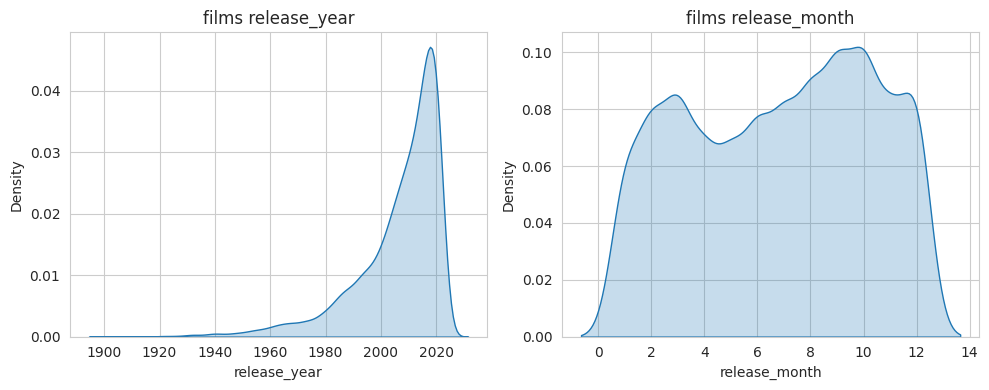

In [19]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.kdeplot(df['release_year'],shade=True)
plt.title('films release_year')

plt.subplot(1,2,2)
sns.kdeplot(df['release_month'],shade=True,)
plt.title('films release_month')
plt.tight_layout()
plt.show()
   

# we can notice that the largest percentage of films were produced between 2000 and 2020 for years and in 9-10 for months

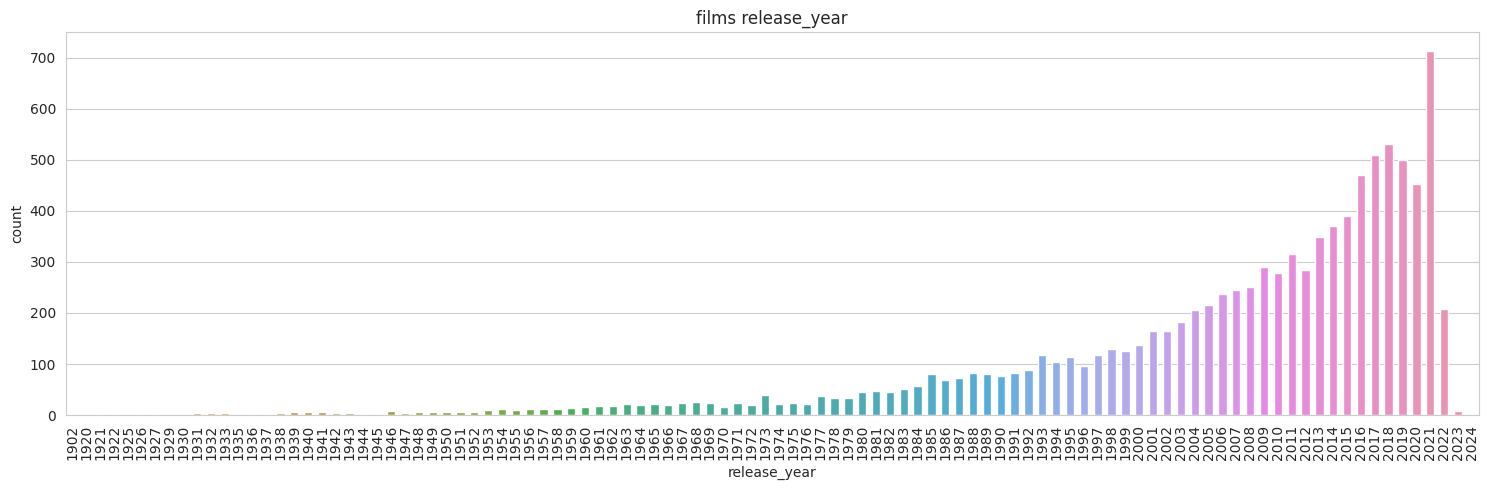

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['release_year'],width=.6)
plt.title('films release_year')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# we can notice that in 2021 the largest number of films were produced

In [21]:
df['season'].value_counts()

season
autumn    2740
Summer    2680
Winter    2305
Spring    2102
Name: count, dtype: int64

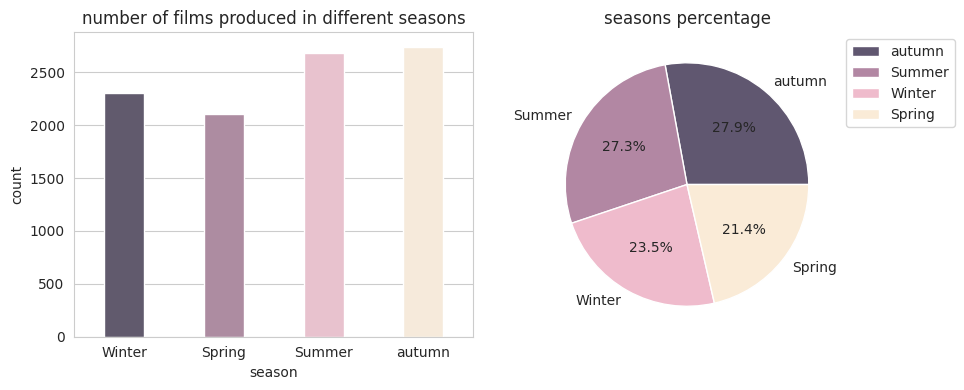

In [22]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x=df['season'],width=.4,palette=colors)
plt.title('number of films produced in different seasons')

plt.subplot(1,2,2)
plt.pie(x=df['season'].value_counts(),labels=df['season'].value_counts().index,autopct='%1.1f%%',colors=colors)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('seasons percentage')
plt.tight_layout()
plt.show()

# **autumn and summer** have the largest number of produced movies

In [23]:
# clean title column
df['title']=df['title'].str.replace(r'[#*¡!.²³⁴rec[]]',"",regex=True).str.strip().str.capitalize()

In [24]:
df['popularity'].nlargest()

0    5083.954
1    3827.658
2    2618.087
3    2402.201
4    1895.511
Name: popularity, dtype: float64

In [25]:
df['popularity'].nsmallest()

9825    13.354
9826    13.354
9824    13.355
9823    13.356
9821    13.357
Name: popularity, dtype: float64

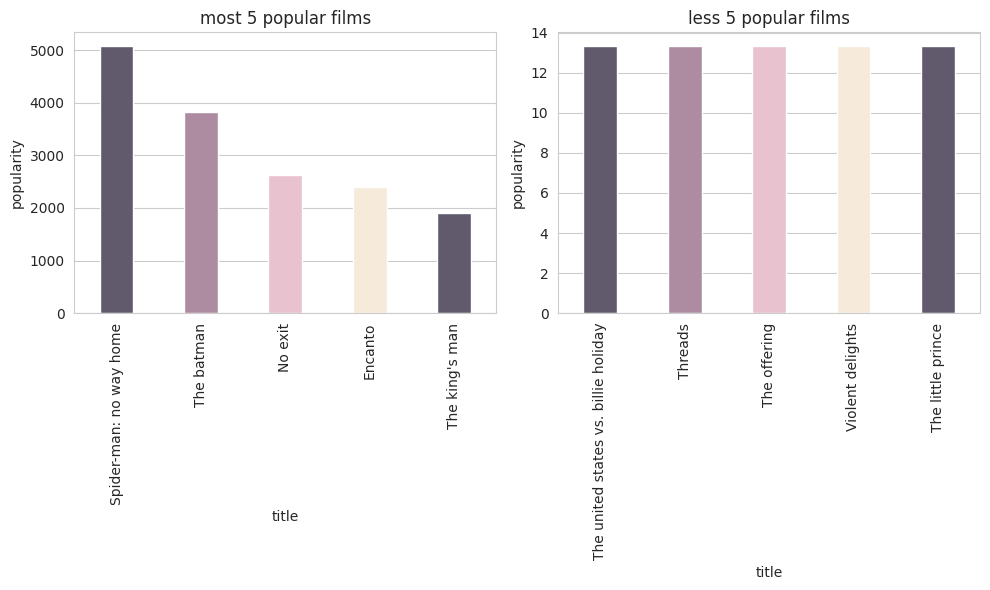

In [26]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(x=df.loc[df['popularity'].nlargest().index,'title'],y=df['popularity'].nlargest(),width=.4,palette=colors)
plt.title("most 5 popular films")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x=df.loc[df['popularity'].nsmallest().index,'title'],y=df['popularity'].nsmallest(),width=.4,palette=colors)
plt.title("less 5 popular films")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# spider-man: no way home is the most popular film

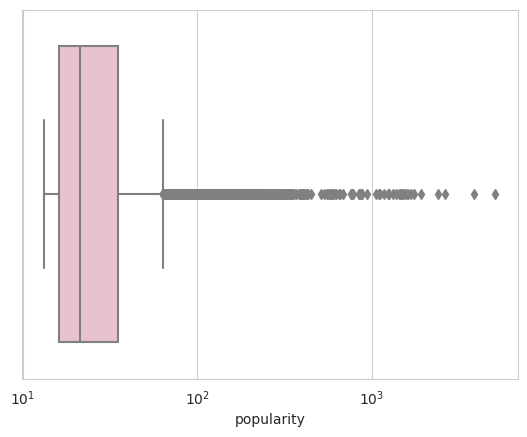

In [27]:
sns.boxplot(x = 'popularity', data = df, color = '#efbbcc')
plt.xscale('log')
plt.show()

In [28]:
very_pop = df['popularity'] >= 1000
pop = (100 <= df['popularity']) & ( df['popularity'] < 1000)
not_pop = (40 < df['popularity']) & ( df['popularity'] < 100)
not_known = df['popularity'] < 40


print(f'count of very popular movies : {very_pop.sum()}')
print(f'count of popular movies : {pop.sum()}')
print(f'count of not popular movies : {not_pop.sum()}')
print(f'count of not known movies : {not_known.sum()}')

count of very popular movies : 23
count of popular movies : 526
count of not popular movies : 1495
count of not known movies : 7783


In [29]:
df['pop_category'] = pd.cut(df['popularity']
                              , bins = [0, 40, 100, 1000, np.inf]
                              , labels = ['Not Known', 'Not Poplur', 'Popular', 'Very Popular'])

In [30]:
df.head()

,title,popularity,vote_count,vote_average,original_language,genre,release_year,release_month,season,pop_category
0,Spider-man: no way home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",2021,12,autumn,Very Popular
1,The batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller",2022,3,Winter,Very Popular
2,No exit,2618.087,122,6.3,en,Thriller,2022,2,Winter,Very Popular
3,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",2021,11,autumn,Very Popular
4,The king's man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",2021,12,autumn,Very Popular


In [31]:
df['pop_category'].value_counts()

pop_category
Not Known       7783
Not Poplur      1495
Popular          526
Very Popular      23
Name: count, dtype: int64

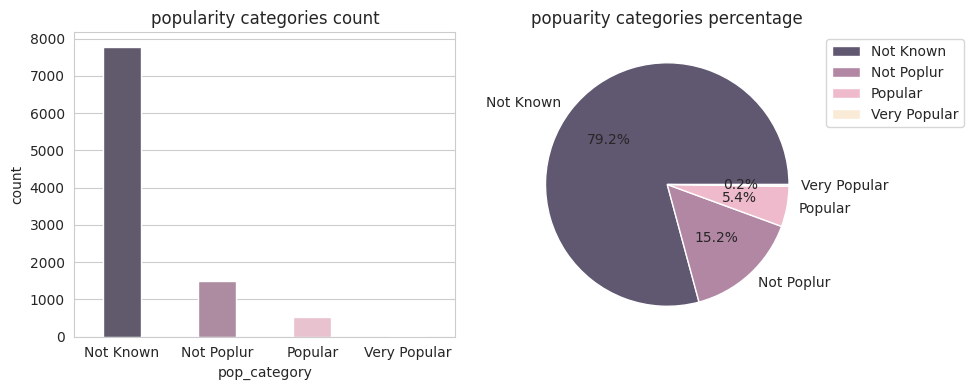

In [32]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x=df['pop_category'],width=.4,palette=colors)
plt.title("popularity categories count")

plt.subplot(1,2,2)
plt.pie(x=df['pop_category'].value_counts(),labels=df['pop_category'].value_counts().index,autopct='%1.1f%%',colors=colors)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('popuarity categories percentage')
plt.tight_layout()
plt.show()

# *not known movies*  take the largest percentage
# very popular movies take .2% of percentage

In [33]:
df['vote_count'].value_counts()

vote_count
0       100
4        38
2        34
3        31
5        31
       ... 
9124      1
1153      1
4698      1
3692      1
1319      1
Name: count, Length: 3266, dtype: int64

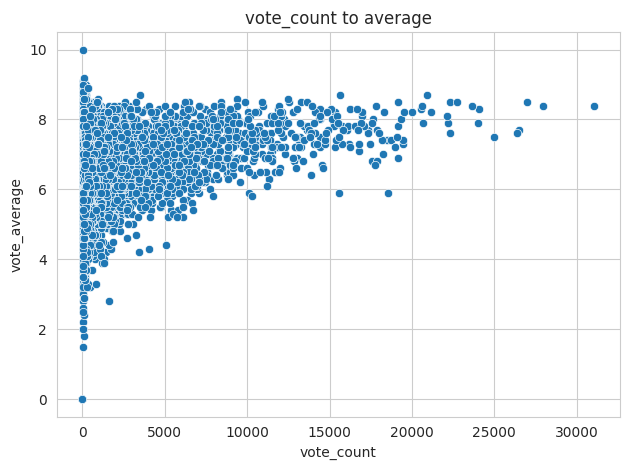

In [34]:
sns.scatterplot(x=df['vote_count'],y=df['vote_average'])
plt.title('vote_count to average')
plt.tight_layout()
plt.show()

# we can saw that films of 0 vote_count take the largest number

In [35]:
df['vote_count'].nlargest(10)

380     31077
461     27975
221     26994
138     26490
195     26390
92      25011
71      24079
1223    24024
407     23620
1312    22733
Name: vote_count, dtype: int64

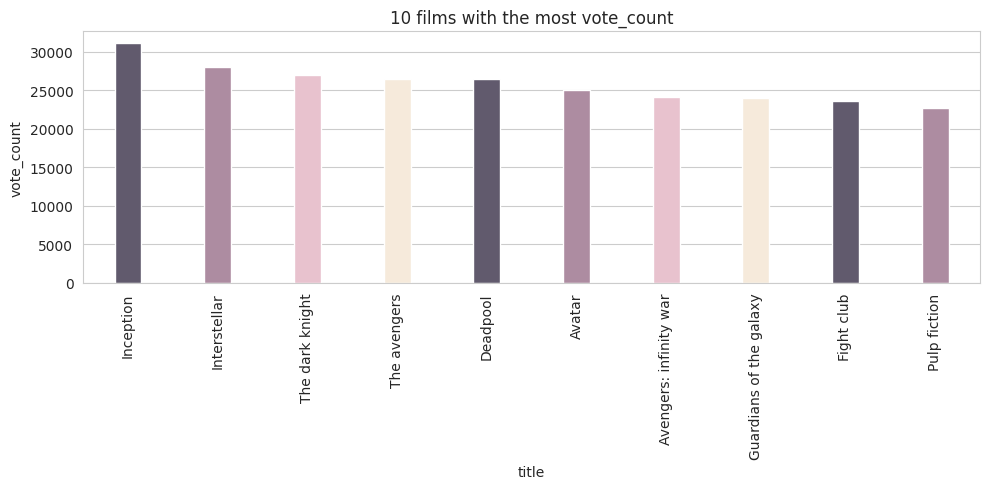

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.loc[df['vote_count'].nlargest(10).index,'title'],y=df['vote_count'].nlargest(10),width=.3,palette=colors)
plt.title('10 films with the most vote_count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# **inception** movie has the most rank

In [37]:
df['vote_average'].value_counts()

vote_average
6.4     435
6.3     429
6.5     427
6.8     423
6.7     420
       ... 
2.2       1
9.2       1
1.5       1
3.1       1
10.0      1
Name: count, Length: 74, dtype: int64

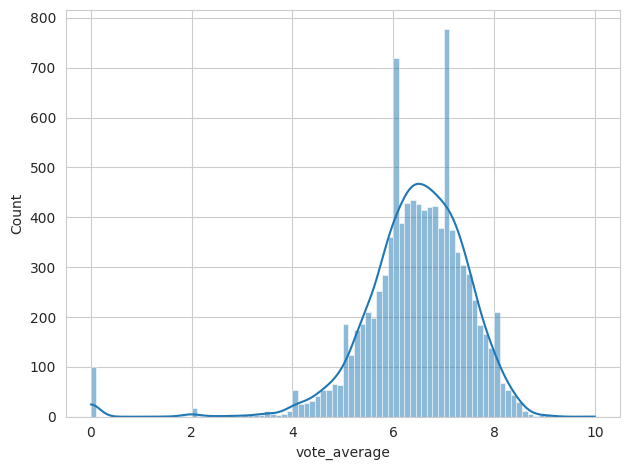

In [38]:
sns.histplot(x=df['vote_average'],kde=True)
plt.tight_layout()
plt.show()

# most vote average lay between 4 and 8

In [39]:
df['original_language'].value_counts()

original_language
en    7570
ja     645
es     339
fr     292
ko     170
zh     129
it     123
cn     109
ru      83
de      82
pt      37
da      28
no      26
hi      26
sv      23
nl      21
pl      17
th      17
id      15
tr      15
tl       8
te       6
el       5
fi       5
sr       5
cs       4
fa       3
hu       3
is       2
ro       2
uk       2
ta       2
ar       2
he       2
ca       1
la       1
nb       1
bn       1
ms       1
lv       1
eu       1
ml       1
et       1
Name: count, dtype: int64

In [40]:
df2=df.copy()
langs_freq = df2['original_language'].value_counts()
langs_freq[langs_freq < 80]

original_language
pt    37
da    28
no    26
hi    26
sv    23
nl    21
pl    17
th    17
id    15
tr    15
tl     8
te     6
el     5
fi     5
sr     5
cs     4
fa     3
hu     3
is     2
ro     2
uk     2
ta     2
ar     2
he     2
ca     1
la     1
nb     1
bn     1
ms     1
lv     1
eu     1
ml     1
et     1
Name: count, dtype: int64

In [41]:
langs_to_group = list(langs_freq[langs_freq < 80].index)
df2.loc[df2['original_language'].isin(langs_to_group),'original_language'] = 'other'

In [42]:
df2['original_language'].value_counts()

original_language
en       7570
ja        645
es        339
fr        292
other     285
ko        170
zh        129
it        123
cn        109
ru         83
de         82
Name: count, dtype: int64

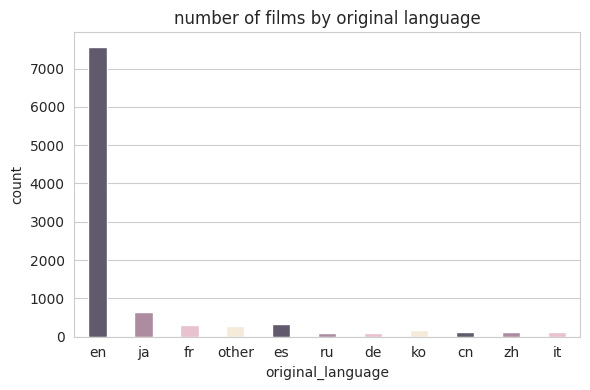

In [43]:
plt.figure(figsize=(6,4))
colors=['#605770','#b287a3','#efbbcc','#faebd7']
sns.countplot(x=df2['original_language'],width=.4,palette=colors)
plt.title("number of films by original language")
plt.tight_layout()
plt.show()

# **English** is the most used language in movies

In [44]:
df["genre"].value_counts()

genre
Drama                                            466
Comedy                                           403
Drama, Romance                                   248
Horror                                           238
Horror, Thriller                                 199
                                                ... 
Drama, Horror, Thriller, Science Fiction           1
Action, Science Fiction, Animation, Adventure      1
Comedy, Fantasy, Horror, Science Fiction           1
Drama, Science Fiction, Animation                  1
War, Drama, Science Fiction                        1
Name: count, Length: 2337, dtype: int64

In [45]:
df2['genre']=df2['genre'].apply(lambda x:x.split(','))
df2=df2.explode('genre')
df2.shape

(25793, 10)

In [46]:
df2

,title,popularity,vote_count,vote_average,original_language,genre,release_year,release_month,season,pop_category
0,Spider-man: no way home,5083.954,8940,8.3,en,Action,2021,12,autumn,Very Popular
0,Spider-man: no way home,5083.954,8940,8.3,en,Adventure,2021,12,autumn,Very Popular
0,Spider-man: no way home,5083.954,8940,8.3,en,Science Fiction,2021,12,autumn,Very Popular
1,The batman,3827.658,1151,8.1,en,Crime,2022,3,Winter,Very Popular
1,The batman,3827.658,1151,8.1,en,Mystery,2022,3,Winter,Very Popular
...,...,...,...,...,...,...,...,...,...,...
9825,The united states vs. billie holiday,13.354,152,6.7,en,Drama,2021,3,Winter,Not Known
9825,The united states vs. billie holiday,13.354,152,6.7,en,History,2021,3,Winter,Not Known
9826,Threads,13.354,186,7.8,en,War,1984,9,Summer,Not Known
9826,Threads,13.354,186,7.8,en,Drama,1984,9,Summer,Not Known


In [47]:
#clean column(genre)
df2['genre']=df2['genre'].str.strip().str.capitalize()

In [48]:
df2["genre"].value_counts()

genre
Drama              3744
Comedy             3031
Action             2686
Thriller           2488
Adventure          1853
Romance            1476
Horror             1470
Animation          1439
Family             1414
Fantasy            1308
Science fiction    1273
Crime              1242
Mystery             773
History             427
War                 308
Music               295
Documentary         215
Tv movie            214
Western             137
Name: count, dtype: int64

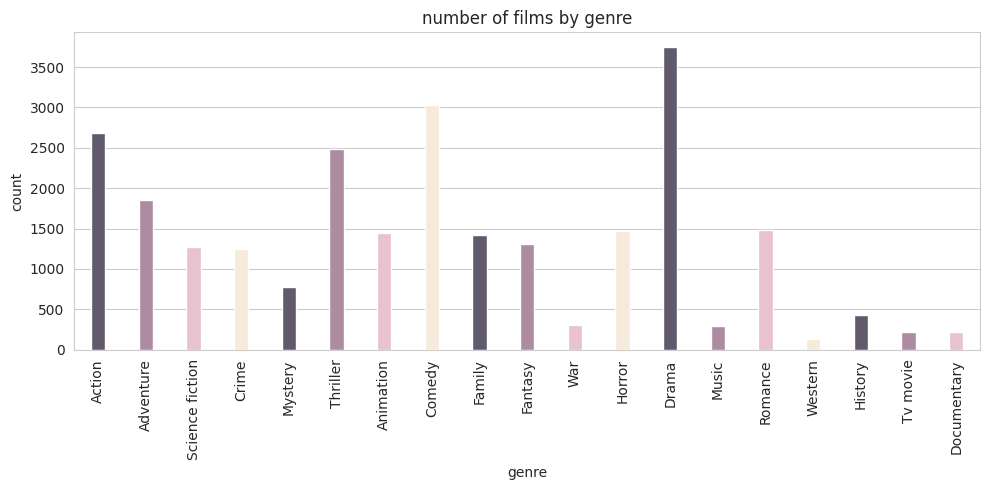

In [49]:
plt.figure(figsize=(10,5))
colors=['#605770','#b287a3','#efbbcc','#faebd7']
sns.countplot(x=df2["genre"],width=.3,palette=colors)
plt.title('number of films by genre')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# **Drama movies** are the most produced movies

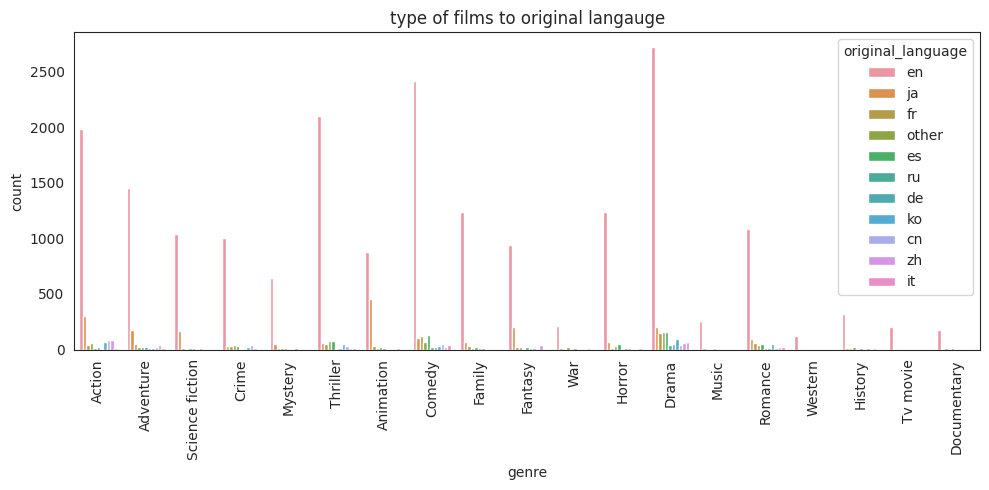

In [50]:
sns.set_style('white')
plt.figure(figsize=(10,5))
sns.countplot(x=df2["genre"],hue=df2['original_language'],width=.8)
plt.title('type of films to original langauge')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# English is the most language used in different films type

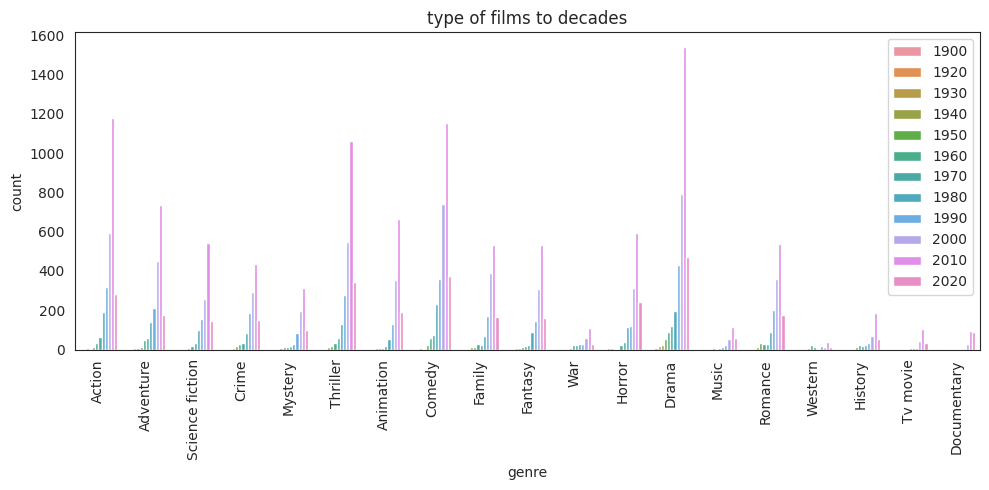

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(x=df2["genre"],hue=(df2['release_year'] // 10 * 10),width=.8)
plt.title('type of films to decades')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 2010 is the decade that has the most number of films released

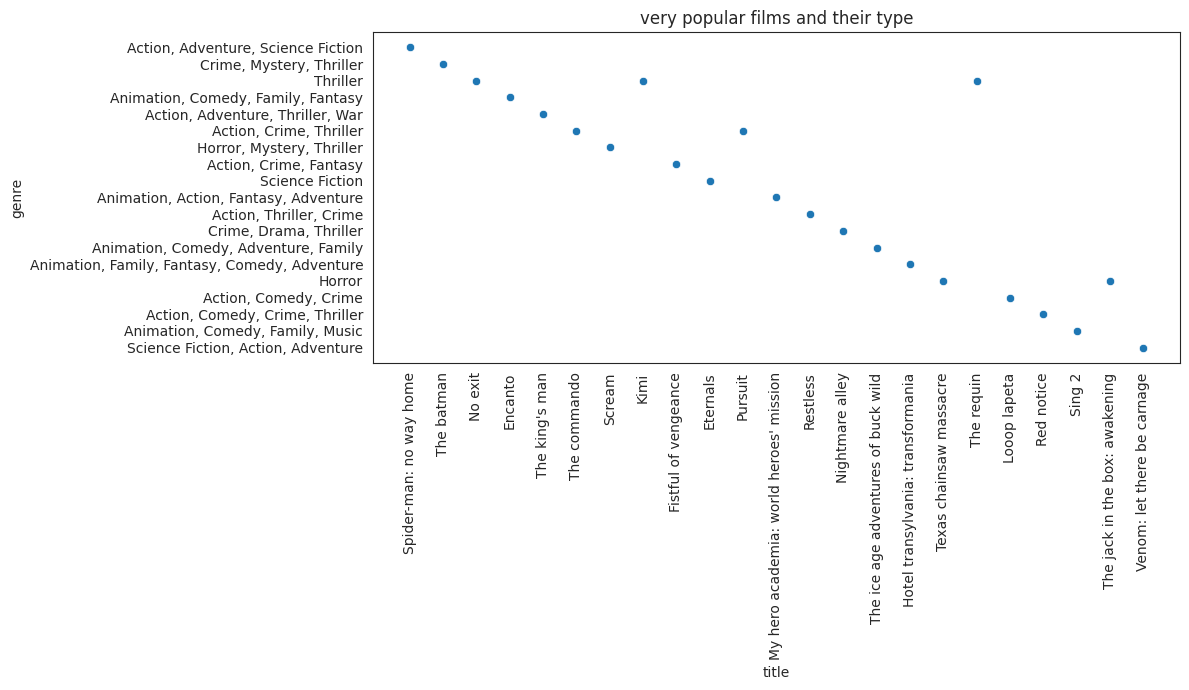

In [52]:

plt.figure(figsize=(12,7))
sns.scatterplot(x=df.loc[df['pop_category']=='Very Popular','title'],y=df.loc[df['pop_category']=='Very Popular','genre'])
plt.title("very popular films and their type")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Spider-Man: No Way Home is the most popular movie and its type is Action, Adventure, Science Fiction

* What is the movie with the highest Popularity rate? And what kind is it? Spider-Man: No Way Home is the most popular movie and its type is Action, Adventure, Science Fiction
* What year was the largest number of films produced? in 2021 the largest number of films were produced
* What is most of the film genre? Drama is the most produced genre
* What kind of movies take the highest rating? inception movie has the most rank
* Which movie is more popular? Spider-Man: No Way Home
* Which movie is less popular? threads ,the offering ,the littel prince and other
* what is most films language? English is the most used language in movies
* in what season were most movies released? autumn
* what is the decate that has the most number of films released? 2010